## OB1 performance the German Nonwords (Bayersman 2020)

In [1]:
from tqdm import tqdm
import mne
import numpy as np
import glob
import os
import pickle
import scipy
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats 
import seaborn as sns
import itertools
from itertools import chain

## Initialising the data frame from pickled file

In [2]:
# GERMAN
df= pd.read_pickle(r"C:\Users\Konstantin\Documents\VU_work\OB1_SAM\Results\alldata_EmbeddedWords_German.pkl")
df=pd.DataFrame(df)

In [3]:
# dataframe columns
print(df.columns.values)

['stimulus' 'prime' 'target' 'condition' 'cycle'
 'lexicon activity per cycle' 'stimulus activity per cycle'
 'target activity per cycle' 'bigram activity per cycle' 'ngrams'
 'exact recognized words positions' 'exact recognized words'
 'eye position' 'attention position' 'word threshold' 'word frequency'
 'word predictability' 'reaction time' 'correct' 'POS' 'position'
 'inhibition_value' 'wordlen_threshold' 'target_inhib' 'error_rate'
 'item_nr']


In [4]:
"""
This code is for checking if the recognition process is working correctly, 
by removing duplicates, sorting, and counting the unique parts and adding these features as new columns in the dataframe.

col_list: is a flattened 1D list of all the lists of words within the column 'exact recognized words'
len_recog: contains length of unique words from the col_list
recog_words: contains the list of unique words
"""

df_check = df[['target', 'condition', 'exact recognized words']]
col_list = df_check['exact recognized words'].values.tolist()
len_recog = []
recog_words = []
#col_list_2 = [x for x in col_list if x != []]
for i in col_list:
    i.sort()
    i = list(l for l, _ in itertools.groupby(i))
    i = list(chain.from_iterable(i))
    i = list(set(i))
    len_recog.append(len(i))
    recog_words.append(i)

# df_check['length of recognised'] = len_recog
df_check['recognised parts'] = recog_words
df_check['unique recognised parts amount'] = len_recog
df_check = df_check.drop('exact recognized words', axis=1)
df_check['recognised parts'][0]

df_check

C:\Users\Konstantin\AppData\Local\Temp\ipykernel_7264\2940542488.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_check['recognised parts'] = recog_words
C:\Users\Konstantin\AppData\Local\Temp\ipykernel_7264\2940542488.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_check['unique recognised parts amount'] = len_recog


,target,condition,recognised parts,unique recognised parts amount
0,arfucht,non-stem/non-suffix,"[haft_, _auf_, t_, _an_, art_, fach_, _am_, et...",10
1,baufarf,non-stem/non-suffix,"[_darf_, _auf_, bar_]",3
2,beunatz,non-stem/non-suffix,"[en_, ant_, ent_, nt_]",4
3,belenau,non-stem/non-suffix,"[en_, ende_, ene_, nen_, _bei_, _genau_]",6
4,bottarf,non-stem/non-suffix,"[ter_, _darf_]",2
...,...,...,...,...
293,stellung,REALWORD/complex,"[ling_, ung_, sel_, _stellung_]",4
294,sucher,REALWORD/complex,"[ler_, ner_, ischer_, eur_, licher_, ter_, er_...",10
295,trainer,REALWORD/complex,"[ner_, ne_, _trainer_, ter_, er_]",5
296,training,REALWORD/complex,"[erin_, _training_, _in_, ling_, antin_]",5


In [5]:
"""
An example of recognised parts of a simple real word
"""
df_check['recognised parts'].iloc[244]

['t_', 'ant_', 'nt_', '_diamant_']

Text(0, 0.5, 'AMOUNT OF UNIQUE RECOGNISED WORD PARTS')

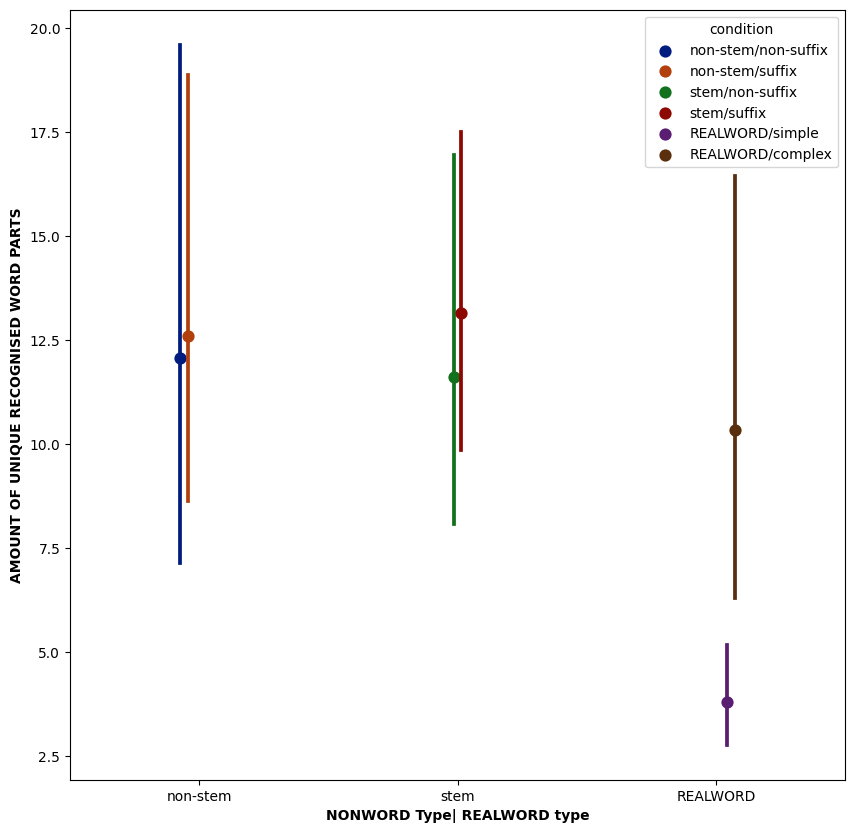

In [6]:
"""Plot showing the amount of unique recognised parts for each condition"""

df_check['stem']=df['condition'].str.split('/').str[0] 
f, ax = plt.subplots(figsize=(10,10))
sns.pointplot(x='stem', y='unique recognised parts amount', hue='condition', palette="dark", dodge = True, data=df_check)
ax.set_xlabel("NONWORD Type| REALWORD type",fontdict=dict(weight='bold'))
ax.set_ylabel("AMOUNT OF UNIQUE RECOGNISED WORD PARTS",fontdict=dict(weight='bold'))

## Making a copy of the dataframe, adding columns for conditions.

In [7]:
"""
This code is used to split the 'condition' column by the '/' character, 
extracting the first and second elements as separate columns ('stem' and 'suffix') and adding these columns to the DataFrame.
It also converts the 'error_rate' column to float and adds it to the DataFrame with new column name 'error'.
"""
df2plot=df.copy(deep=True)
df2plot['stem']=df['condition'].str.split('/').str[0] 
df2plot['suffix']=df['condition'].str.split('/').str[1]
df2plot['RT']=df2plot['reaction time'].str[0]
#df2plot['Realwords'] = df2plot['stem'] == "REALWORDS"

# correct vs incorrect
df2plot['cor'] = df2plot['correct'].str[0]

# error
df2plot['error'] = df2plot['error_rate'].astype(float)

Text(0, 0.5, 'Error Rate (max: 2.0, min 0.8)')

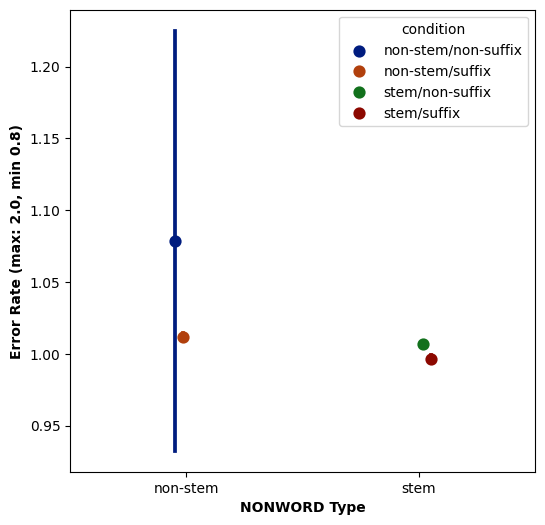

In [8]:
"""
This plot can be used to visualize the relationship between the different nonword types and the error rate in the given conditions.
For non-stem condition: suffixes bring error rate down.
For stem condition: real stems have a slight reducing effect and stem+suffix condition even more so. 
"""
df3plot=df.copy(deep=True)
df3plot = df2plot.iloc[:238]

f, ax = plt.subplots(figsize=(6,6))

sns.pointplot(x='stem', y='error', hue='condition', palette="dark", ci='sd', dodge=True, font_scale=0.8, data=df3plot)

ax.set_xlabel("NONWORD Type",fontdict=dict(weight='bold'))
#ax.set_xlabel("REALWORD Type",fontdict=dict(weight='bold'))
#ax.set_ylabel("Reaction Time (ms)",fontdict=dict(weight='bold'))
ax.set_ylabel("Error Rate (max: 2.0, min 0.8)",fontdict=dict(weight='bold'))


Text(0, 0.5, 'Error Rate (max: 2.0, min 0.8)')

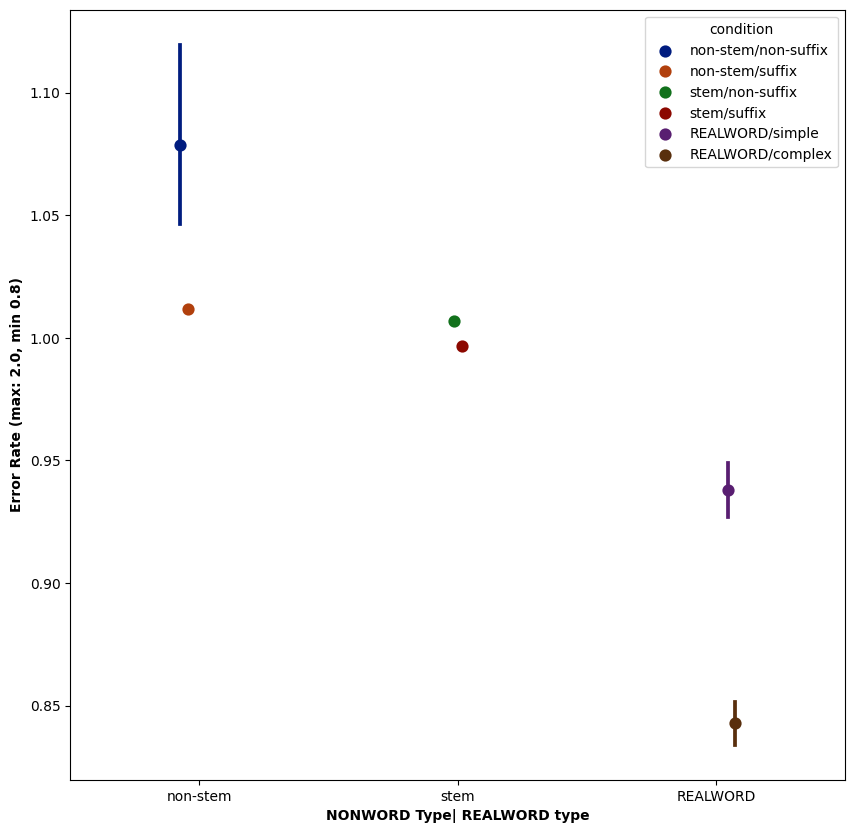

In [9]:
"""
This plot can be used to visualize the relationship between all conditions types and the error rate.
Effect of suffixes on REALWORDS seems to have an impact (in line with the 2020 paper)
"""
df_check['stem']=df['condition'].str.split('/').str[0] 
f, ax = plt.subplots(figsize=(10,10))
sns.pointplot(x='stem', y='error', hue='condition', palette="dark", dodge = True, data=df2plot)
ax.set_xlabel("NONWORD Type| REALWORD type",fontdict=dict(weight='bold'))
ax.set_ylabel("Error Rate (max: 2.0, min 0.8)",fontdict=dict(weight='bold'))

## Showing maximum lexicon activity in all cycles / plot reaction times per conditions

In [10]:
"""
Get max of lexicon activity in all cycles, 
It's useful as it's reducing the column to a single value.
"""
df2plot['lexicon activity per cycle'] = df2plot['lexicon activity per cycle'].apply(max)
df2plot['lexicon activity per cycle']

0       56.150175
1       20.900792
2      104.473554
3      147.557889
4       58.993020
          ...    
293     79.173599
294     96.552867
295    138.464438
296     55.483788
297    156.959715
Name: lexicon activity per cycle, Length: 298, dtype: float64

Text(0, 0.5, 'lexicon activity across cycles')

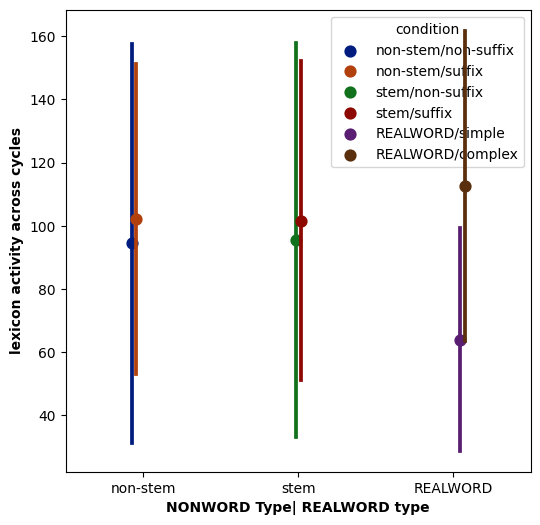

In [11]:
"""
visualizing the relationship between different nonword/realword types and the lexicon activity per cycle for different conditions.
"""

f, ax = plt.subplots(figsize=(6,6))

sns.pointplot(x='stem', y='lexicon activity per cycle', hue='condition', palette="dark", ci='sd', dodge=True, font_scale=0.8, data=df2plot) 

ax.set_xlabel("NONWORD Type| REALWORD type",fontdict=dict(weight='bold'))
ax.set_ylabel("lexicon activity across cycles",fontdict=dict(weight='bold'))


Text(0, 0.5, 'Reaction Time (ms)')

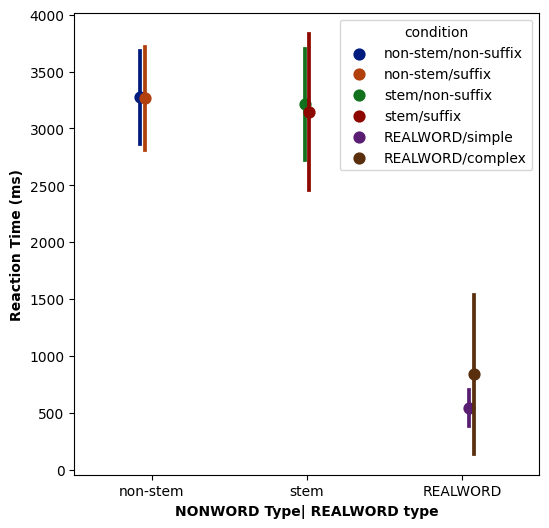

In [12]:
"""
visualizing the relationship between different nonword/realword types and the Reaction times for different conditions.
Simple real words require slightly less reaction time than complex ones (after latest fix: overall RT is better represented)
"""

f, ax = plt.subplots(figsize=(6,6))

sns.pointplot(x='stem', y='RT', hue='condition', palette="dark", ci='sd', dodge=True, font_scale=0.8, data=df2plot) 

ax.set_xlabel("NONWORD Type| REALWORD type",fontdict=dict(weight='bold'))
ax.set_ylabel("Reaction Time (ms)",fontdict=dict(weight='bold'))


Text(0, 0.5, 'Count')

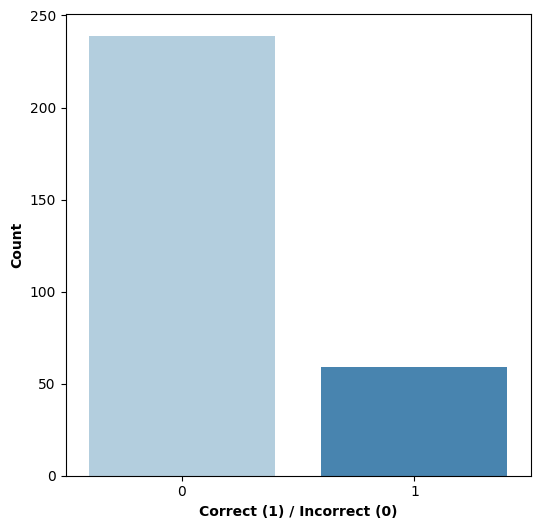

In [13]:
"""
Plot provides number of counts for correct and incorrect responses.
"""
f, ax = plt.subplots(figsize=(6,6))
sns.countplot(x='cor', data=df2plot, palette="Blues")

ax.set_xlabel("Correct (1) / Incorrect (0)",fontdict=dict(weight='bold'))
ax.set_ylabel("Count",fontdict=dict(weight='bold'))

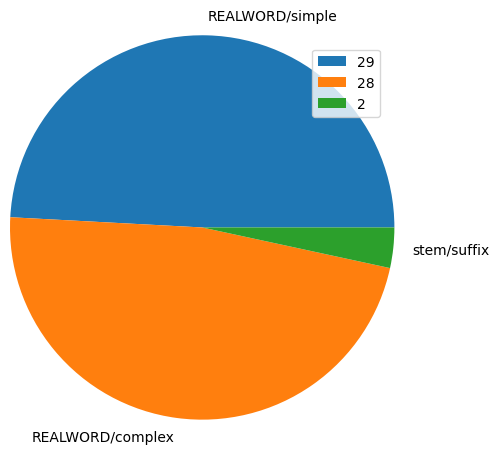

In [14]:
"""
Pie chart of the conditions that have correctly recognised words, 
Both REALWORD/simple and REALWORD/complex should be dominating
and non-stem/non-suffix should not be visible at all.
"""

df_correct = df2plot[df2plot['cor'] == 1]
word_column = df_correct['condition']
word_counts = word_column.value_counts()
n = 200
top_condt = word_counts.nlargest(n)

plt.pie(top_condt, labels=top_condt.index, radius=1.3)
#plt.title('Conditions of Correct words')
plt.legend(word_counts, loc='best')
plt.show()

## Plotting Lexicon activity per cycle

In [15]:
target2plot = df.copy(deep=True)

In [16]:
"""
Converting the 'lexicon activity per cycle' column to a column of arrays (instead of lists)
"""

target2plot['lexicon activity per cycle'] = target2plot['lexicon activity per cycle'].apply(lambda x: np.array(x))

In [17]:
"""
In order to mkae data consistent accross rows within the columns, 
this code pads the rows with zeros until they are equal in length to the maximum number of cycles.
It also fills any remaining NaN with zeros.
"""
#first figure out max amount of cycles per trial:
max_cycles=0
for i in range(len(target2plot)): # goes to 0 - 297
    max_cycles=max(max_cycles, len(target2plot.iloc[i]['lexicon activity per cycle']))
# print(f'maximum number of cycles: {max_cycles}')
# print('\n')
# then pad the shorter cycles with zeros until the max cycle amount (in place)
for i in range(len(target2plot)):
    target2plot.at[i,'lexicon activity per cycle']=np.pad(np.hstack(target2plot.iloc[i]['lexicon activity per cycle']), (0,max_cycles-len(target2plot.iloc[i]['lexicon activity per cycle'])), mode='constant')

target2plot = target2plot.explode('lexicon activity per cycle')
target2plot = target2plot.reset_index().rename(columns={'index': 'trial'})
target2plot['lexicon activity per cycle'] = target2plot['lexicon activity per cycle'].fillna(0)
#target2plot

37846


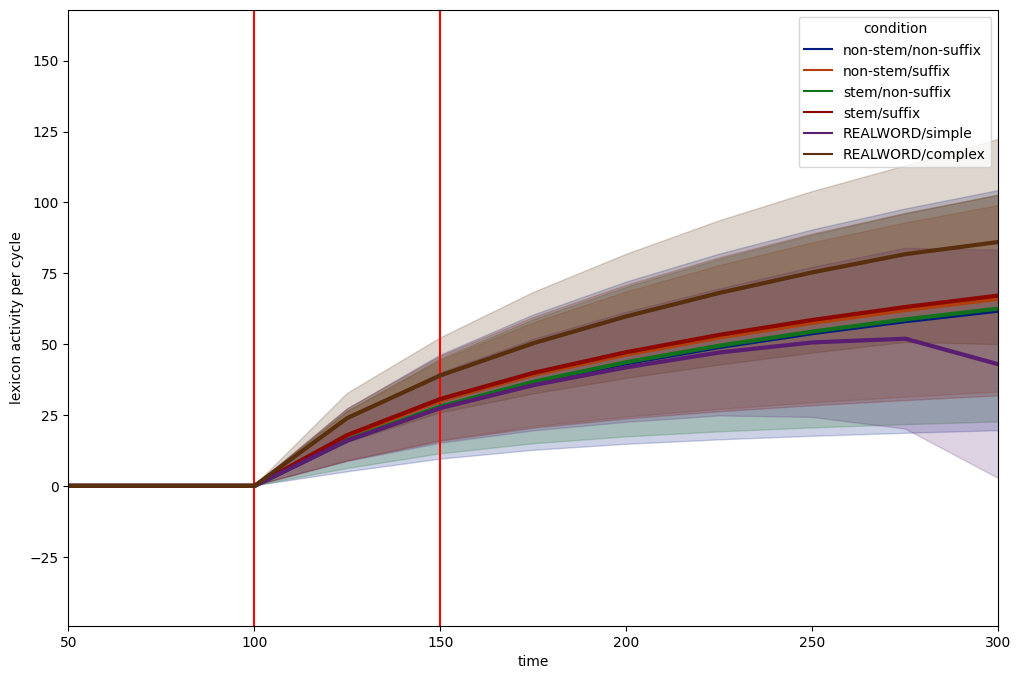

In [18]:
"""
A plot of lexicon activity per cycle against time
"""
# initializing list of lists 

test_list = list(range(max_cycles))

# declaring magnitude of repetition 
K = len(df)
#print(K, test_list, len(K*test_list))

m = K*test_list
print(len(target2plot))
#change from target2plot["cycle nr"] = m to :
target2plot["cycle nr"] = m
target2plot['time']= target2plot['cycle nr']*25

f, ax = plt.subplots(figsize=(12,8))

ax.set_xlim(left=50, right=300)

ax.axvline(x=4*25, color='red') #prime onset

ax.axvline(x=6*25, color='red') #target onset

sns.lineplot(ax=ax, data=target2plot, x="time", y="lexicon activity per cycle", hue = "condition",palette='dark' , ci='sd',  linewidth=3)

plt.show()


## target inhibition per cycle, between conditions


In [19]:
target3plot = df.copy(deep=True)

In [20]:
target3plot['target_inhib'] = target3plot['target_inhib'].apply(lambda x: np.array(x))

In [21]:
#first figure out max amount of cycles per trial:
max_cycles=0
for i in range(len(target3plot)):
    max_cycles=max(max_cycles, len(target3plot.iloc[i]['target_inhib']))
print(max_cycles)
#then pad the shorter cycles with zeros until the max cycle amount (in place)
for i in range(len(target3plot)):
    target3plot.at[i,'target_inhib']=np.pad(np.hstack(target3plot.iloc[i]['target_inhib']), (0,max_cycles-len(target3plot.iloc[i]['target_inhib'])), mode='constant')

    
target3plot = target3plot.explode('target_inhib')
target3plot = target3plot.reset_index().rename(columns={'index': 'trial'})

len(target3plot.tail(1)['cycle'])

127


1

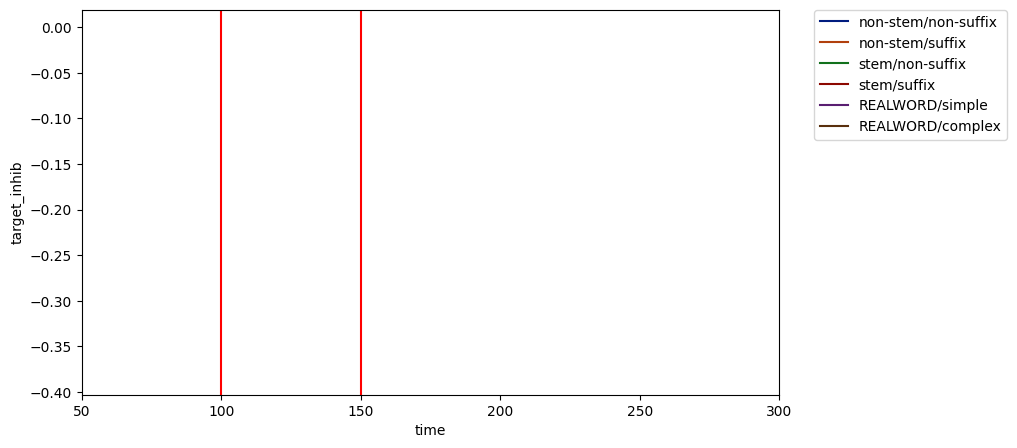

In [22]:
#initializing list of lists 
test_list = list(range(max_cycles))

# declaring magnitude of repetition 
K = len(df)

m = K*test_list
target3plot["cycle nr"] = range(len(target3plot))
target3plot['time']= target3plot['cycle nr']*25

f, ax = plt.subplots(figsize=(9,5))

ax.set_xlim(left=50, right=300)

ax.axvline(x=4*25, color='red') #prime onset

ax.axvline(x=6*25, color='red') #target onset

sns.lineplot(ax=ax, data=target3plot, x="time", y="target_inhib", hue = "condition",palette='dark' , ci='sd',  linewidth=3)


plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

In [23]:
target2plot_lexiconcycle = target2plot[target2plot['cycle nr'] == 6]
target2plot_inhibcycle = target2plot[target2plot['cycle nr'] == 6]

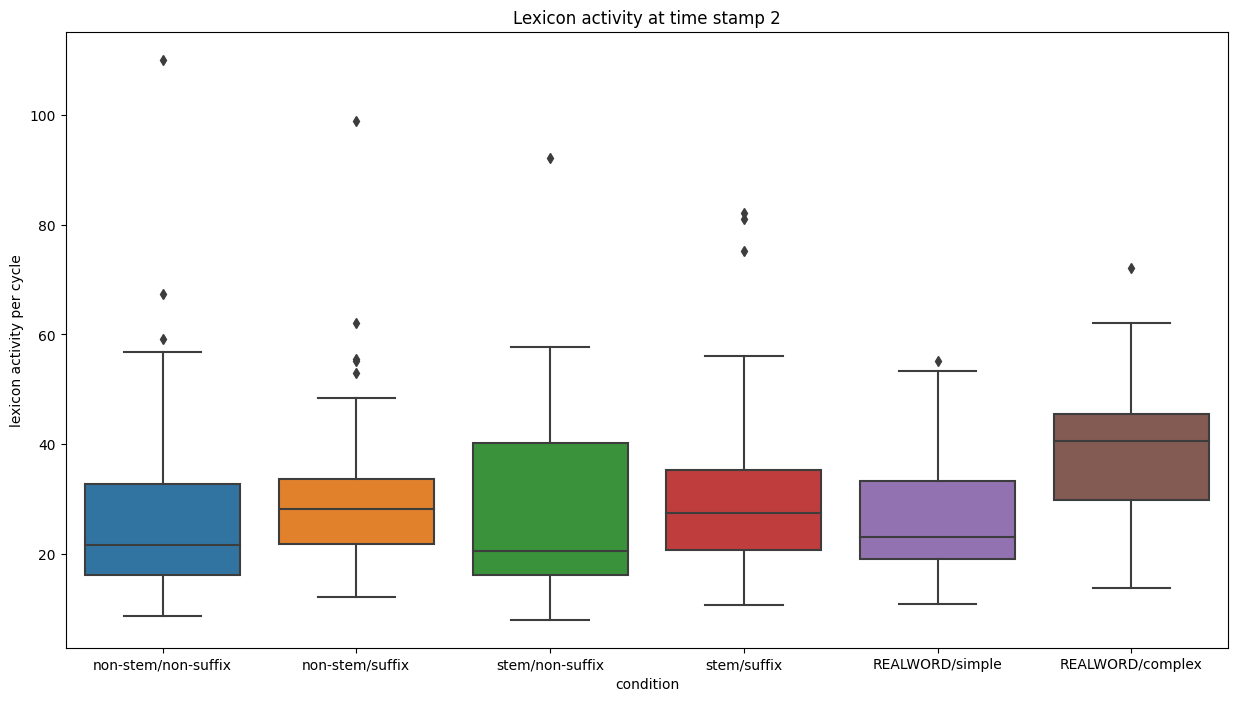

In [24]:
"""
Lexicon activity at time stamp 2
"""
f, ax = plt.subplots(figsize=(15,8))

#sns.boxplot(ax = ax, x = 'condition', y = 'target_inhib', data = target2plot_inhibcycle)
#sns.boxplot(ax = ax, x = 'condition', y = 'target activity per cycle', data = target2plot_inhibcycle)
sns.boxplot(ax = ax, x = 'condition', y = 'lexicon activity per cycle', data = target2plot_lexiconcycle)
plt.title('Lexicon activity at time stamp 2')
plt.show()

In [25]:
# f, ax = plt.subplots(figsize=(15,8))

# fix = pd.DataFrame(target2plot_inhibcycle.to_dict())

# #sns.violinplot(ax = ax, x = 'condition', y = 'target_inhib', data = fix)
# sns.violinplot(ax = ax, x = 'condition', y = 'lexicon activity per cycle', data = fix)
# plt.title('inhibition of target at time step 2')
# plt.show()